<a href="https://colab.research.google.com/github/ashish19950830/-Advertising-Analysis/blob/main/creating_simple_linear_regrtession_model_for_advertising_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
#"This project is a simple linear regression analysis on the Advertising dataset to understand the relationship between advertising budget and sales."
#"The dataset contains the advertising budget spent on TV, Radio, and Newspaper, along with the corresponding sales figures. The goal was to predict sales based on the advertising budget."
#"A linear regression model will be used to predict sales. The dataset will be  split into training and test sets, and the model will evaluate on the test set."

In [124]:
import numpy as np
import pandas as pd

In [125]:
# reading the data

In [126]:
advertising = pd.read_csv('/content/advertising.csv')

In [127]:
advertising.shape

(200, 4)

In [128]:
ad = advertising

In [129]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [130]:
#visualise the data for better understanding

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
import warnings
warnings.filterwarnings('ignore')

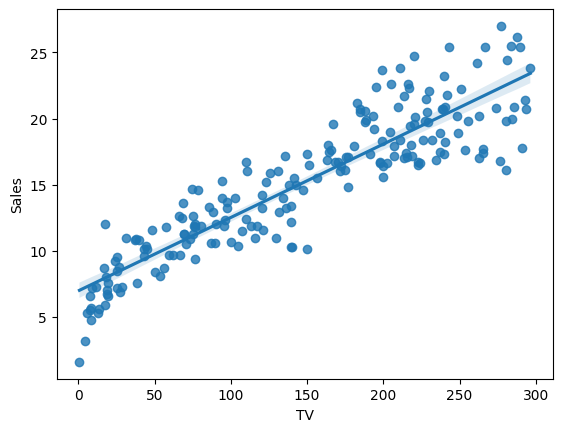

In [133]:
sns.regplot(x = "TV" , y = "Sales" , data = ad)
plt.show()

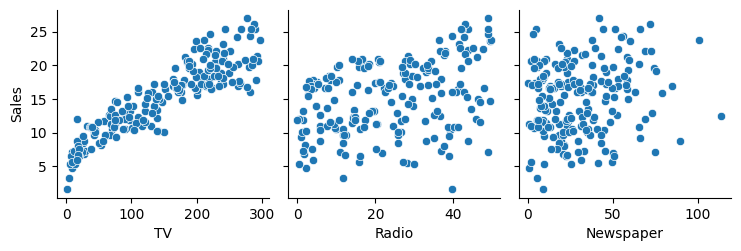

In [134]:
 # good way is to use pair plot to see all the variables in one go so


sns.pairplot(data = ad , x_vars = ["TV" , "Radio" , "Newspaper"] , y_vars = "Sales")
plt.show()

In [135]:
# here we can see very vclearly that out of all, te variables te one which is hogly coorelated is TV we
# can also use heat map toe see tge coorelateion

ad.corr() # it gives a squrae matrix that shows the corelkation between various variablesmimport warnings
warnings.filterwarnings('ignore')

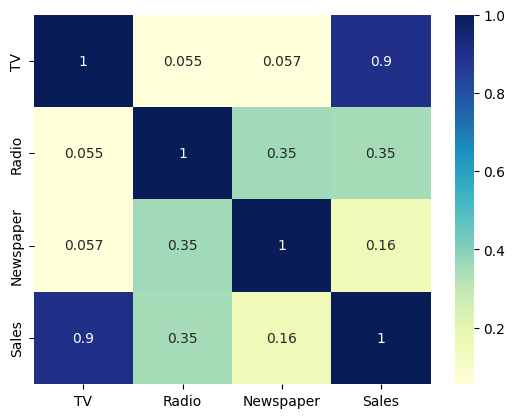

In [136]:
# now we can plot the heat map

sns.heatmap(ad.corr() , cmap = 'YlGnBu' , annot = True)
plt.show()

In [137]:
# this is the first step im building linear reggression model
# and ubderstanding the relation between the independent variable and the target variable

In [138]:
# so performing a simple liner regg  ,
# equation af a general linear regg is of the foprm
# y = c + mixi + m2x2 ....mnxn
# where y is tghe output bor dependent variable
# m is the coeff or model param
# to build a model we use a library callled statsnodel , statsmodels.api as sm & sklearn

import statsmodels
import statsmodels.api as sm
import sklearn



In [139]:
## steps will be as follows
# we create predictive var (x) and target var (y)
# we crwete trainn and test data set to train our model with existing data then test it for other data
# the ratio between those two sets are generally taken as (70 - 30)
# now once tge nodel is created we train our data set ( which basically means to laern the coeff)
# then  finally bwe will. evaluate our moidel in respevct to both ( train set and test set)



In [140]:
# creating x and y

X = ad["TV"]  # making a subset
y = ad["Sales"]

In [141]:
# next is to do a train _test _ split
# so we will use sklearn to make tarin tset splits because it comes with a package called model_selection
# which helps us to split the data


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
# now we will make train tset data in ration 70-30
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.70 , random_state = 100) # we use random state as selection is random process
# in order we get same datac each time we do do random_state = 100
# so here we get 4 enteties



In [144]:
# training the data

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [145]:
# fitting the model

lr = sm.OLS(y_train , X_train_sm) # heare we are giving data tpo our algoritm to learn the coeff , wher ols stands for ordinary least squares
# where in it has purpose of minimising the sum of mean squres of the errors realted tpo every single data
lr_model = lr.fit()
lr_model.params  # to see the pararmetrs that the model has now



,0
const,6.948683
TV,0.054546


In [146]:
#  so this is the model that we have got(sales = 6.948 + 0.0545 TV )
# this declares that when a unit of investment is done on adv for tv the amt of sales that will increase is 0.0545
#and even if we dont spend on tv it willl give you 6.948 amt of sales


lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           1.52e-52
Time:                        10:35:17   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

,0
74,18.588747
3,15.212365
185,18.130563
26,14.743271
90,14.274178
...,...
87,12.986898
103,17.197830
67,14.546907
24,10.346884


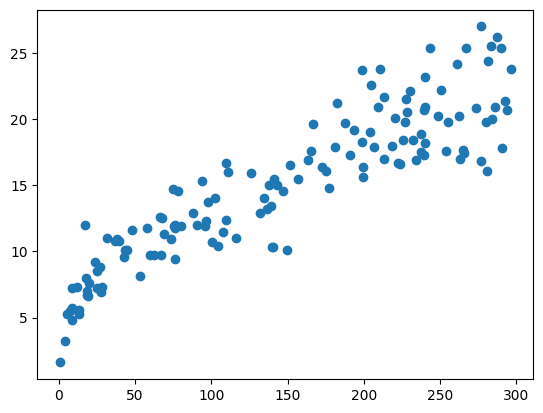

In [148]:
# p value for both th ecoef is zero that means both values are signikficant and has not obtained purely by chance
# r squared value 81% means that 81% variance in sales has been able to explain by the model
#now we will create a scatter plot of training data


plt.scatter(X_train , y_train)
plt.show()

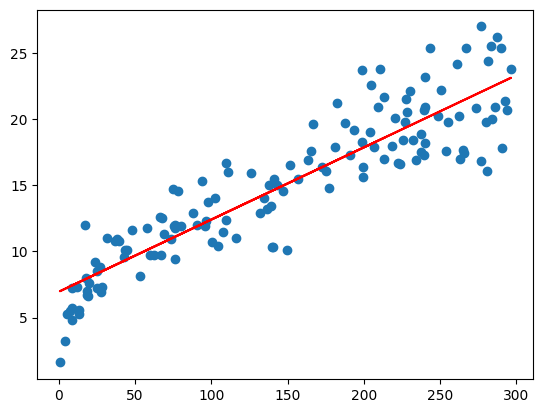

In [149]:
# now we will craete a graph of the model which is generally a staright line
plt.scatter(X_train , y_train)
plt.plot(X_train ,  y_train_pred , "r")
plt.show()

In [150]:
# now we will carry out residual analysis of the model
# erroe =  f(y_train , y_pred)

res = y_train - y_train_pred
res


,0
74,-1.588747
3,1.287635
185,4.469437
26,0.256729
90,-0.274178
...,...
87,3.013102
103,2.502170
67,-1.146907
24,-0.646884


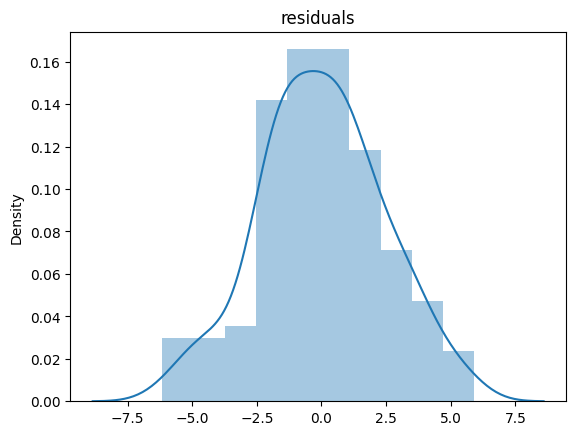

In [151]:
# now we will plot the residuals
plt.figure()
sns.distplot(res)
plt.title("residuals")
plt.show()

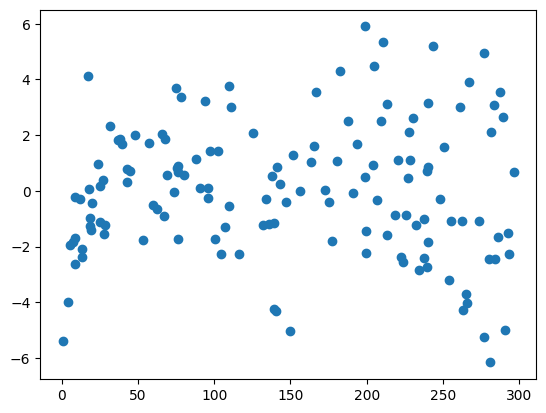

In [152]:
# residuals are following the normal distribution
# now we wil;l see weather the residuals id following some poatter or not


plt.scatter(X_train , res)
plt.show()

In [153]:
# so here we cannot se any pattern which is a good sign
# so we can nowproceed for predicting data on the test set



In [154]:
#making predictions and evaliuation on the test test
# prediction on the test set
# evaluate the model
# so first we will add a consttant or an intercept to the test set
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7
167,1.0,206.8
116,1.0,139.2
96,1.0,197.6
52,1.0,216.4
69,1.0,216.8


In [155]:
# pred on test

y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

,0
126,7.374140
104,19.941482
99,14.323269
92,18.823294
111,20.132392
167,18.228745
116,14.541452
96,17.726924
52,18.752384
69,18.774202


In [156]:
# so now we will evaluate the model , r_squared  , on the test
# for that we will import some necesssary libraries from sklearn

from sklearn.metrics import mean_squared_error , r2_score

In [157]:
# r squuared

r2 = r2_score(y_true = y_test ,y_pred =  y_test_pred)
r2

0.792103160124566

In [158]:
# r2 on train was
r2_score(y_true = y_train , y_pred = y_train_pred)

0.8157933136480389

In [159]:
# so here we can say that what the model has learn with the training data set it cvan nicely can predict or the taest data set

# now we commute mean_squared _error

mean_squared_error(y_true = y_test , y_pred = y_test_pred)

4.077556371826953

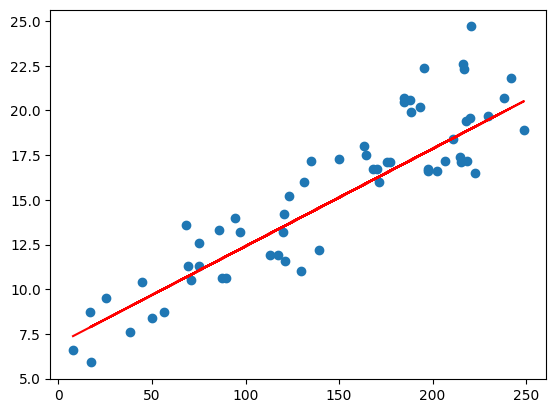

In [160]:
# now we will visualise prediction on the test sety
plt.scatter(X_test , y_test)
plt.plot(X_test , y_test_pred , "r")
plt.show()

In [161]:
# so here we conclude that our model is working efficiently

In [162]:
#Findings - The final model shows a strong positive correlation between the advertising budget and sales. The visualization below represents the predicted vs. actual sales."

In [163]:
#conclusion :The model performs well, indicating that the advertising budget is a significant predictor of sales. This project demonstrates the application of linear regression to real-world data."

# New section

# New section